# Bike Sharing Assignment

## Problem Statement :__
    
    A US bike-sharing provider BoomBikes has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to end.

## The company wants to know:__
    
-  Which variables are significant in predicting the demand for shared bikes.
-  How well those variables describe the bike demands.

## The solution is divided into the following sections:__
    
    

### 1.  Data Understanding and exploration
### 2.  Data Visualisation & EDA
### 3.  Data Preparation
### 4.  Model building and evaluation

### Step 1: Data Understanding and exploration :: Reading and Understanding the Data
  Let's start with the following steps:

-  Importing useful libraries
-  Understanding the structure of the data

In [766]:
# supress warnings
import warnings
warnings.filterwarnings("ignore")

In [767]:
# importing necessary libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [768]:
# importing dataset

bikesharing = pd.read_csv("day.csv")

In [769]:
# checking the first 5 rows of the dataset

bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [770]:
# checking the shape of the dataset 

bikesharing.shape

(730, 16)

In [771]:
# checking the info of the dataset 

bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### we have no null values in all columns 

In [772]:
# Getting mathematical insights of the data 

bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [773]:
# Checking the datatypes of the dataset

bikesharing.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [774]:
# checking the dimension of the data

bikesharing.ndim

2

In [775]:
# checking the size of the data

bikesharing.size

11680

In [776]:
# checking the axes of the data 

bikesharing.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [777]:
# checking th column names of the data

bikesharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [778]:
# checking the values of the data 

bikesharing.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

### Step 2: Data Visualisation :: Visualising the Data
Let's now spend some time doing what is arguably the most important step - understanding the data.

-  If there is some obvious multicollinearity going on, this is the first place to catch it
-  Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

In [779]:
# let us make a new variable which indicates that how much days old this business is-

bikesharing['days_old'] = (pd.to_datetime(bikesharing['dteday'],format='%d-%m-%Y')-pd.to_datetime('01-01-2018',format='%d-%m-%Y')).dt.days

### step 2.1- cleaning the data 

dropping the variables which are not usful in model building -

* instant is just a row instant identifier 
* dteday has no use as we already have records on monthly,yearwise & weekday records in our dataset so we can drop that column
* casual & registered variables are also no use as we already have cnt column which is sum of casual & reistered columns 

### So we can drop that 4 columns-
    instant
    dteday
    casual
    registered 
    

In [780]:
bikesharing.drop(['instant'],axis=1,inplace=True)

In [781]:
bikesharing.drop(['dteday'],axis=1,inplace=True)

In [782]:
bikesharing.drop(['casual'],axis=1,inplace=True)

In [783]:
bikesharing.drop(['registered'],axis=1,inplace=True)

In [784]:
# after dropping checking the dataset 

bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


### as we can see that season & weathersit & month & weekday columns doesn't have their names they are in numeric form it should be in categorical type 

### let us check their value counts & change them via their specific naames 

In [785]:
bikesharing['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [786]:
bikesharing['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [787]:
bikesharing['mnth'].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [788]:
bikesharing['weekday'].value_counts()

weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: count, dtype: int64

In [789]:
bikesharing.season.replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)

In [790]:
bikesharing.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace=True)

In [791]:
bikesharing.mnth.replace({1:'jan',2:'fab',3:'march',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'},inplace=True)

In [792]:
bikesharing.weekday.replace({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'},inplace=True)

In [793]:
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


In [794]:
# handling missing values 

bikesharing.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days_old      0
dtype: int64

### as we can see that we don't have any missing values in any of the columns 

### handling outliers 

for checking outliers in any numeric column let us draw box plot for those columns.

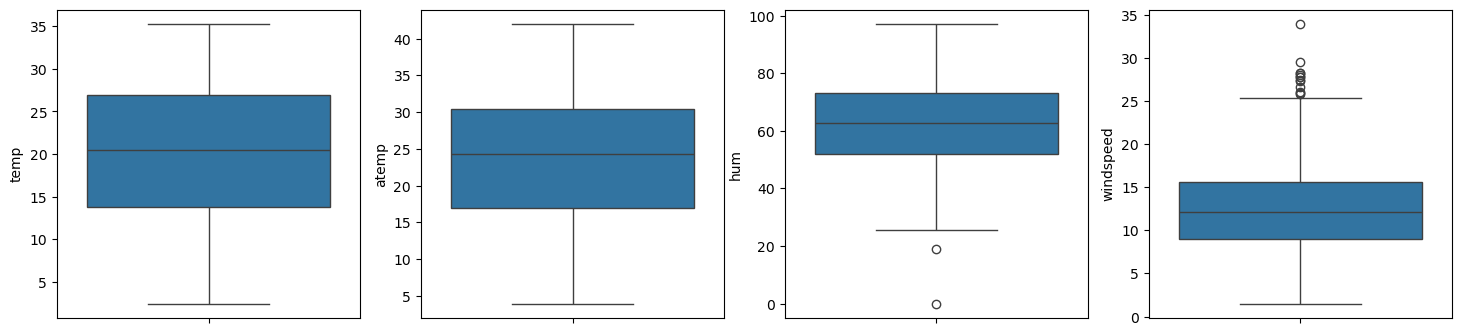

In [795]:
cols = ['temp','atemp','hum','windspeed']
plt.figure(figsize=(18,4))

i=1
for column in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=column,data=bikesharing)
    i+=1



--> as we can see that we don't have any outliers in any of the columns 

## STEP 2.2 EDA

### DRAW PAIRPLOTS TO CHECK THE LINEAR RELATIONSHIP 

<Figure size 600x600 with 0 Axes>

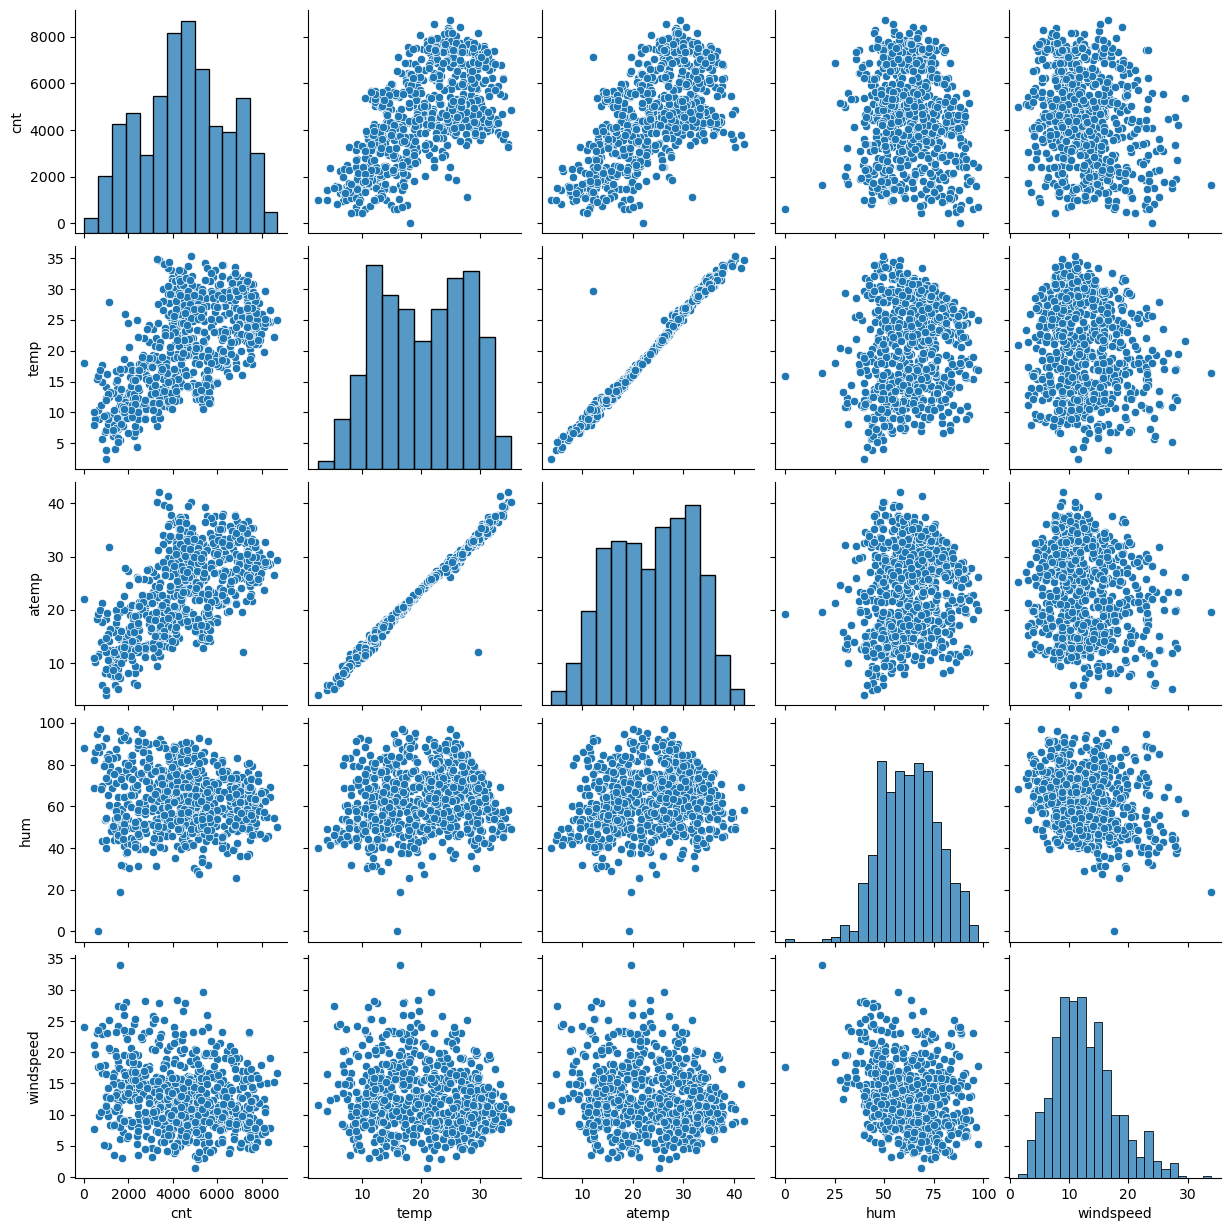

In [796]:
plt.figure(figsize=(6,6))
sns.pairplot(data=bikesharing,vars=['cnt','temp','atemp','hum','windspeed'])
plt.show()

--> here we can clearly see that the temp & atemp variable has the strongest correlation with each other & with the target variable also 

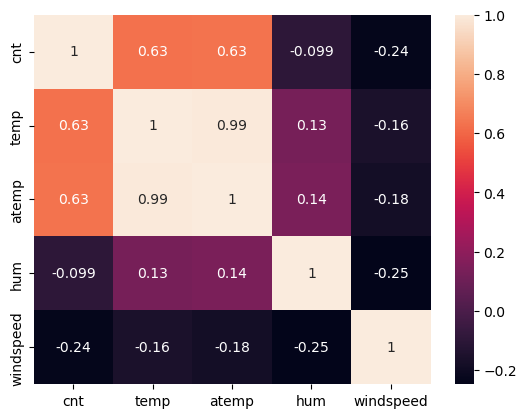

In [797]:
# plotting heatmap to check correlation between variables 

sns.heatmap(bikesharing[['cnt','temp','atemp','hum','windspeed']].corr(),annot=True)
plt.show()

### here clearly we can see that temp & atemp has the highest correlation as we can conclude that one is defined by another so we can drop one variable 

### analysing categorical variables with numerical variables 

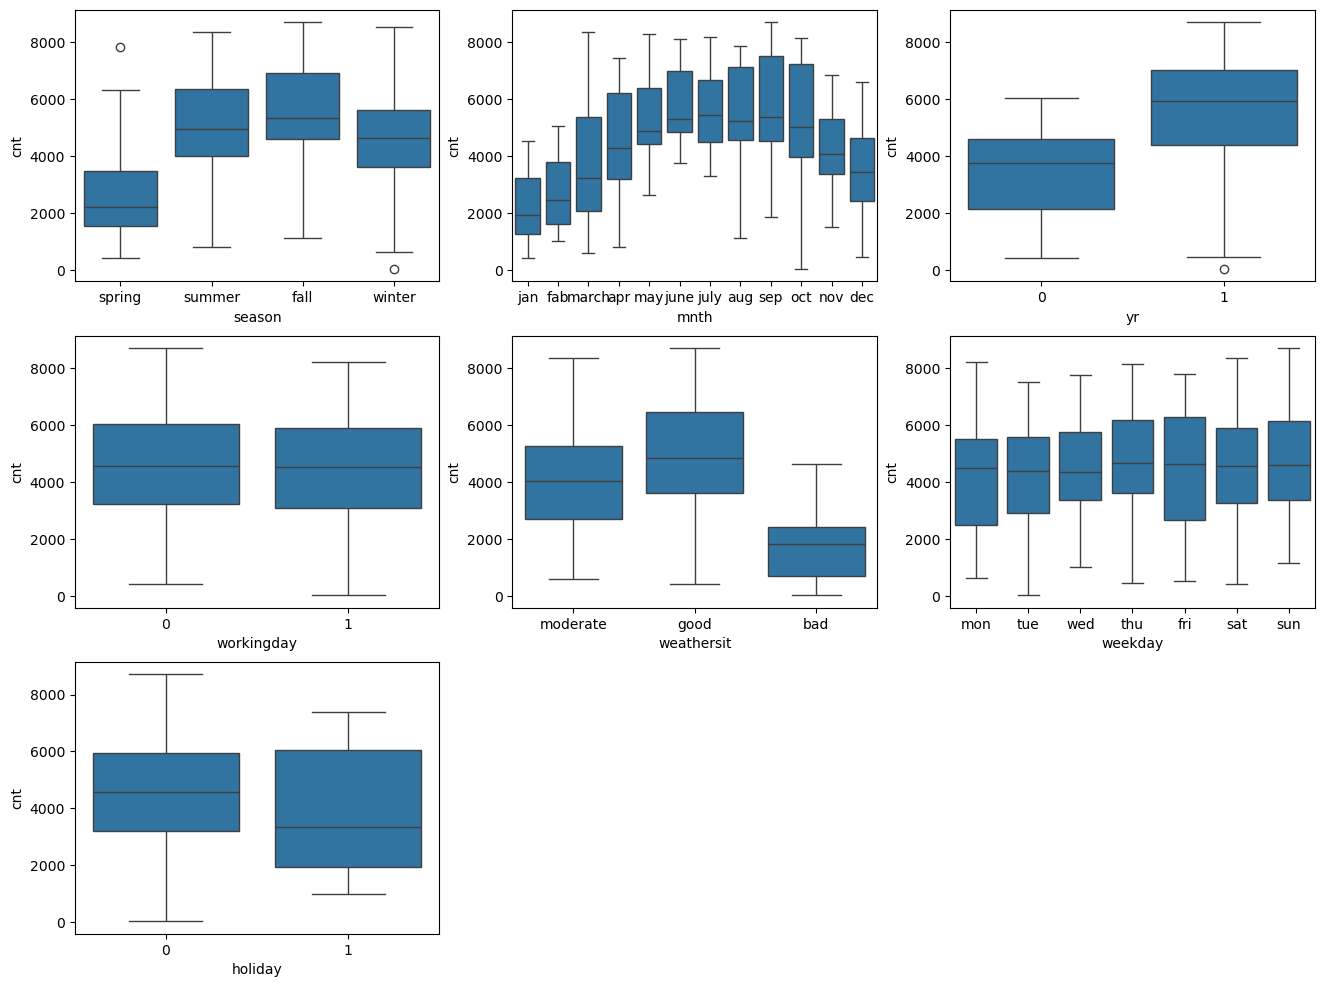

In [798]:
plt.figure(figsize=(16,12))
cat_vars=['season','mnth','yr','workingday','weathersit','weekday','holiday']

for i in enumerate(cat_vars):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikesharing,x=i[1],y='cnt')
plt.show()

# inferences 

1. we got that mostly demand has done in fall season.
2. most no. of bikes are rented in the month of september.
3. bike are rented more from te second year.
4. working day has no more impact on demand.
5. holiday also has no more such impact on demand.
6. the good weathersit has highest demand.
7. we seen that demand increased as months are increased then september month has highest demand then after september demand has decreased 

--> so we can conclude that weather has most important factor in bike rental system.


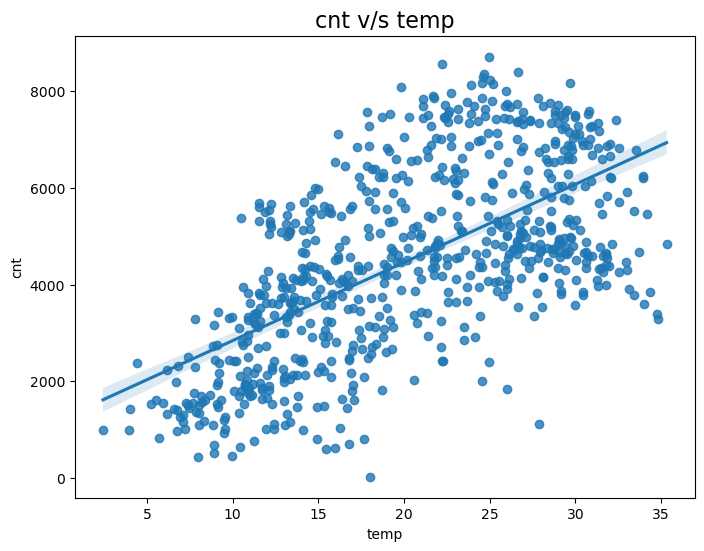

In [799]:
# ploting each numeric variable with target variable to get insights

plt.figure(figsize=(8,6))
plt.title('cnt v/s temp',fontsize=16)
sns.regplot(data=bikesharing,y='cnt',x='temp')
plt.show()


# inferences

1. demands for bikes is positively correlated with the temperature
2. we can clearly see that demands are increasing with the increament of temperature

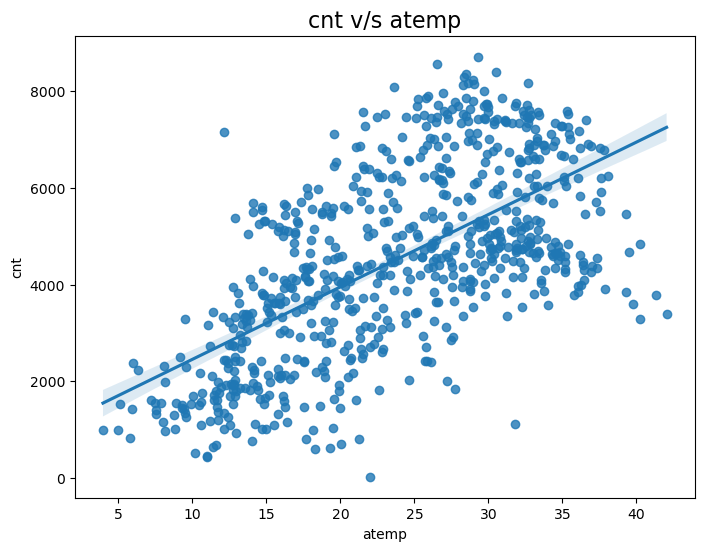

In [800]:
plt.figure(figsize=(8,6))
plt.title('cnt v/s atemp',fontsize=16)
sns.regplot(data=bikesharing,y='cnt',x='atemp')
plt.show()

# inferences

as we know that temp & atemp are highly correlated wiuth each other so atemp is also positively correlate with demand of bikes.


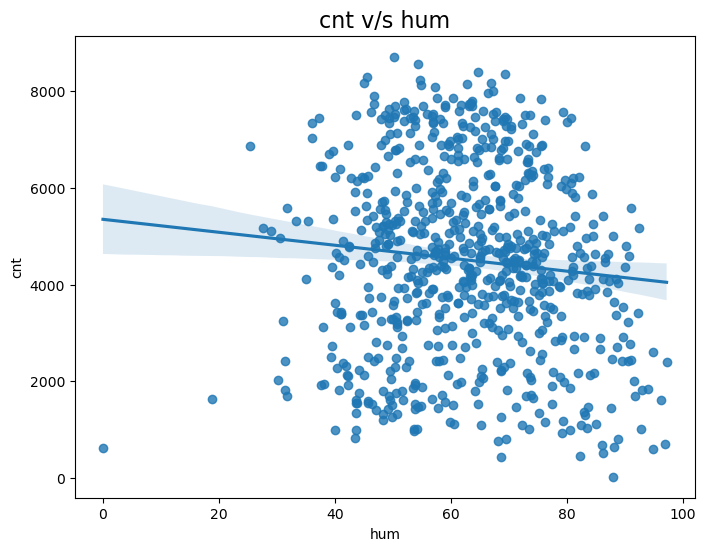

In [801]:
plt.figure(figsize=(8,6))
plt.title('cnt v/s hum',fontsize=16)
sns.regplot(data=bikesharing,y='cnt',x='hum')
plt.show()

# inferences 

as we can clearly see that demands are decreasing with the increment of humidity 
so we can say that humidity is negatively correlated with the demand.

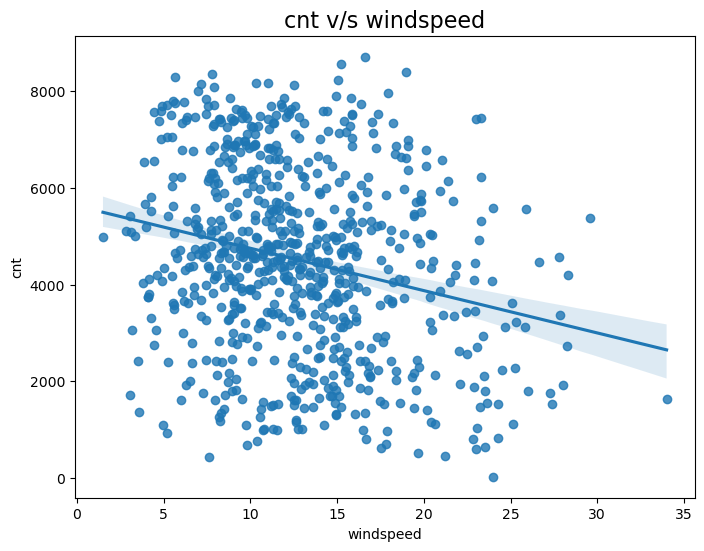

In [802]:
plt.figure(figsize=(8,6))
plt.title('cnt v/s windspeed',fontsize=16)
sns.regplot(data=bikesharing,y='cnt',x='windspeed')
plt.show()

# inferences 

1. as we seen here windspeed is also negatively correlate with the demands .
2. it shattered in one place means at certain points of windspeed it is increasing then going decresed after that certain point.

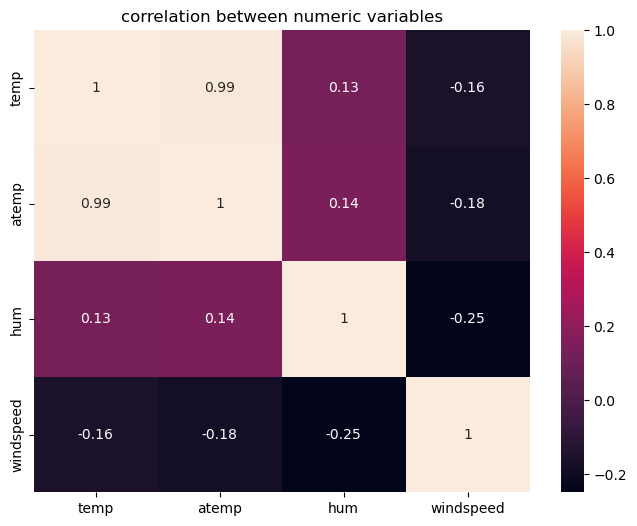

In [803]:
# plotting heatmap of numeric variables with the target variable to get insights 

num_vars = ['temp','atemp','hum','windspeed']
plt.figure(figsize=(8,6))
plt.title('correlation between numeric variables',fontsize=12)
sns.heatmap(bikesharing[num_vars].corr(),annot=True)
plt.show()

# inferences 

1. temp &^ atemp are highly correlated with target variable. 

# step 3. data preparation for linear regression 

## 3.1 creating dummy variables for categorical variables

In [804]:
bikesharing = pd.get_dummies(data = bikesharing,columns=['season','mnth','weekday'],drop_first=True,dtype = int)

In [805]:
bikesharing = pd.get_dummies(data = bikesharing,columns=['weathersit'],dtype = int)

In [806]:
# checking dataset again after dummy creation 

bikesharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,1,0


In [807]:
# checking columns of the dataset 

bikesharing.columns.tolist()

['yr',
 'holiday',
 'workingday',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'cnt',
 'days_old',
 'season_spring',
 'season_summer',
 'season_winter',
 'mnth_aug',
 'mnth_dec',
 'mnth_fab',
 'mnth_jan',
 'mnth_july',
 'mnth_june',
 'mnth_march',
 'mnth_may',
 'mnth_nov',
 'mnth_oct',
 'mnth_sep',
 'weekday_mon',
 'weekday_sat',
 'weekday_sun',
 'weekday_thu',
 'weekday_tue',
 'weekday_wed',
 'weathersit_bad',
 'weathersit_good',
 'weathersit_moderate']

# STEP 4. model building & evaluation

In [808]:
# import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 4.1 spliting data into train & test dataset

In [809]:
# taking y as target variable 

y = bikesharing.pop('cnt')

In [810]:
x = bikesharing

In [811]:
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size = 0.7,random_state = 42)

In [812]:
X_train.shape

(510, 31)

In [813]:
X_test.shape

(220, 31)

In [814]:
y_train.shape

(510,)

In [815]:
y_test.shape

(220,)

In [816]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
645,1,1,0,15.716653,19.38040,70.9583,12.708493,645,0,0,...,0,0,0,0,0,1,0,0,0,1
163,0,0,1,26.035000,30.08270,49.4583,20.458450,163,0,1,...,0,0,0,0,0,0,1,0,1,0
360,0,0,1,13.325000,16.38165,76.2500,12.626150,360,1,0,...,0,0,0,0,1,0,0,0,0,1
640,1,0,1,26.957500,29.95665,79.3750,4.458569,640,0,0,...,0,0,0,0,1,0,0,0,0,1
625,1,0,1,25.556653,28.25335,87.2500,23.958329,625,0,0,...,1,0,0,0,0,0,1,0,0,1


## 4.2 feature scaling in continuous variables

In [817]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score


In [818]:
# do scaling on continuous variables 

num_vars = ['temp','atemp','hum','windspeed','days_old']
scaler = MinMaxScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [819]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.884774,0,0,...,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.223594,0,1,...,0,0,0,0,0,0,1,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.493827,1,0,...,0,0,0,0,1,0,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.877915,0,0,...,0,0,0,0,1,0,0,0,0,1
625,1,0,1,0.703024,0.637937,0.899098,0.839562,0.857339,0,0,...,1,0,0,0,0,0,1,0,0,1


## 4.3 build a model using RFE & automated approach 

In [820]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [821]:
# selecting useful variables through RFE 

rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [822]:
# selected variables by RFE & their weights 

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 15),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_aug', False, 4),
 ('mnth_dec', False, 2),
 ('mnth_fab', False, 11),
 ('mnth_jan', False, 7),
 ('mnth_july', False, 12),
 ('mnth_june', False, 5),
 ('mnth_march', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', False, 3),
 ('mnth_oct', True, 1),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 16),
 ('weekday_sun', False, 14),
 ('weekday_thu', False, 17),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 9),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 6)]

# 4.4 manual elimination 

In [823]:
# function to build a model using statsmodels api 

def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train,X_train_sm).fit()
    print(lm.summary())
    return lm
    

In [824]:
# function to calculate VIF & proint them 

def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['FEATURES'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['VIF'] =round(vif['VIF'],2)
    print(vif.sort_values(by = 'VIF' , ascending = False))

In [825]:
# features selected by RFE

X_train.columns[rfe.support_].tolist()

['yr',
 'holiday',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'days_old',
 'season_spring',
 'season_winter',
 'mnth_march',
 'mnth_may',
 'mnth_oct',
 'mnth_sep',
 'weathersit_bad',
 'weathersit_good']

In [826]:
# features not selected by RFE 

X_train.columns[~rfe.support_].tolist()

['workingday',
 'season_summer',
 'mnth_aug',
 'mnth_dec',
 'mnth_fab',
 'mnth_jan',
 'mnth_july',
 'mnth_june',
 'mnth_nov',
 'weekday_mon',
 'weekday_sat',
 'weekday_sun',
 'weekday_thu',
 'weekday_tue',
 'weekday_wed',
 'weathersit_moderate']

In [827]:
# taking those 15 columns selected by RFE for regression

X_train_rfe = X_train[['yr','holiday','temp','atemp','hum','windspeed','days_old','season_spring','season_winter','mnth_jan','mnth_july','mnth_oct','mnth_sep','weathersit_bad','weathersit_good']]

## 4.4 building a model 

### MODEL - I

In [828]:
# making model with selected columns by RFE - 
#column 'atemp' is selected by RFE but we should not take it because it has already correlated with 'temp' column.

cols = ['yr','holiday','temp','atemp','hum','windspeed','days_old','season_spring','season_winter','mnth_jan','mnth_july','mnth_oct','mnth_sep','weathersit_bad','weathersit_good']

In [829]:
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.0
Date:                Mon, 12 Aug 2024   Prob (F-statistic):          1.58e-185
Time:                        15:26:16   Log-Likelihood:                -4116.6
No. Observations:                 510   AIC:                             8265.
Df Residuals:                     494   BIC:                             8333.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3036.5297    347.178     

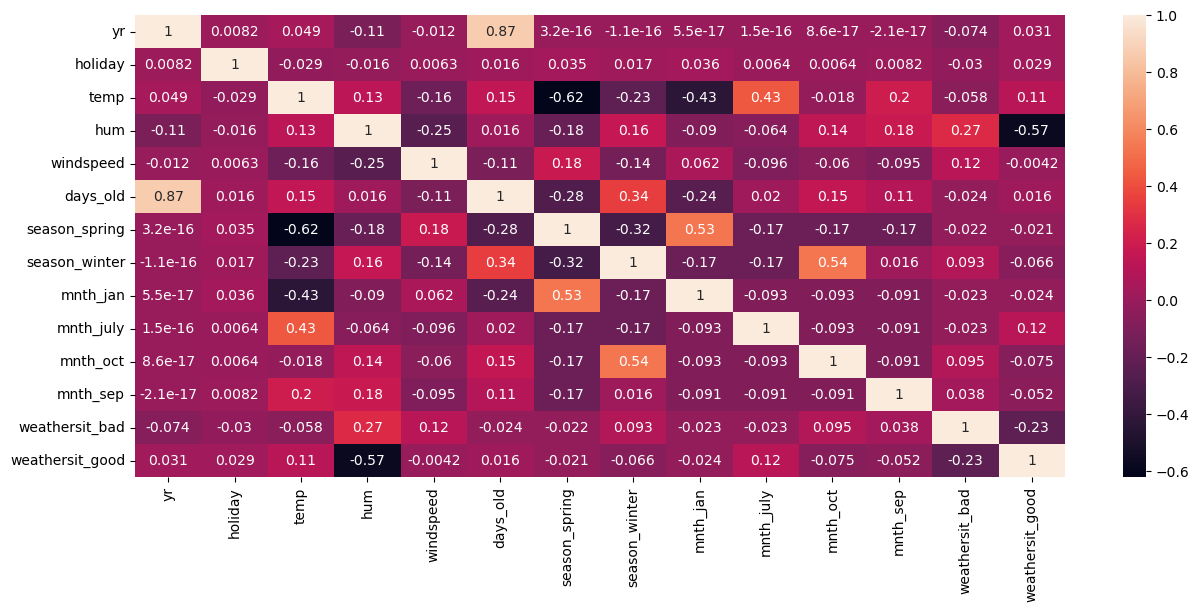

In [830]:
# checking correlation between variables which are selected by RFE - 

plt.figure(figsize=(15,6))
sns.heatmap(bikesharing[['yr','holiday','temp','hum','windspeed','days_old','season_spring','season_winter','mnth_jan','mnth_july','mnth_oct',
                         'mnth_sep','weathersit_bad','weathersit_good']].corr(),annot = True)
plt.show()

### MODEL -II

In [831]:
# dropping thr variable 'mnth-jan' as it has -ve co-ef & high p-value.

cols = ['yr','holiday','temp','atemp','hum','windspeed','days_old','season_spring','season_winter','mnth_july','mnth_oct','mnth_sep','weathersit_bad','weathersit_good']

In [832]:
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.3
Date:                Mon, 12 Aug 2024   Prob (F-statistic):          5.82e-186
Time:                        15:26:17   Log-Likelihood:                -4118.3
No. Observations:                 510   AIC:                             8267.
Df Residuals:                     495   BIC:                             8330.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2939.2453    343.786     

### MODEL =III

In [833]:
# dropping variable 'temp' as it has very high multi-collinearity with 'temp' variable . so it is defined by temp variable only so dropping it will be no lose 

cols = ['yr','holiday','atemp','hum','windspeed','days_old','season_spring','season_winter','mnth_july','mnth_oct','mnth_sep','weathersit_bad','weathersit_good']

In [834]:
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     198.7
Date:                Mon, 12 Aug 2024   Prob (F-statistic):          4.65e-187
Time:                        15:26:17   Log-Likelihood:                -4118.5
No. Observations:                 510   AIC:                             8265.
Df Residuals:                     496   BIC:                             8324.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2929.7414    343.061     

### MODEL -IV

In [835]:
# dropping 'hum' variable as it has -ve co-ef & very high VIF.

cols = ['yr','holiday','temp','windspeed','days_old','season_spring','season_winter','mnth_july','mnth_oct','mnth_sep','weathersit_bad','weathersit_good']

In [836]:
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.0
Date:                Mon, 12 Aug 2024   Prob (F-statistic):          4.22e-184
Time:                        15:26:17   Log-Likelihood:                -4128.3
No. Observations:                 510   AIC:                             8283.
Df Residuals:                     497   BIC:                             8338.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1952.8173    239.990     

### MODEL -V

In [837]:
# dropping 'days_old' variable as it has -ve co-ef 

cols = ['yr','holiday','temp','windspeed','season_spring','season_winter','mnth_july','mnth_oct','mnth_sep','weathersit_bad','weathersit_good']

In [838]:
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.9
Date:                Mon, 12 Aug 2024   Prob (F-statistic):          9.81e-183
Time:                        15:26:17   Log-Likelihood:                -4134.3
No. Observations:                 510   AIC:                             8293.
Df Residuals:                     498   BIC:                             8343.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1749.6223    235.194     

### MODEL -VI

In [839]:
# dropping 'days_old' variable as it has -ve co-ef 

cols = ['yr','holiday','temp','windspeed','season_spring','season_winter','mnth_july','mnth_oct','mnth_sep','weathersit_good']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     215.1
Date:                Mon, 12 Aug 2024   Prob (F-statistic):          8.59e-174
Time:                        15:26:17   Log-Likelihood:                -4158.3
No. Observations:                 510   AIC:                             8339.
Df Residuals:                     499   BIC:                             8385.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1612.7966    245.409     

### MODEL - VII

In [840]:
# dropping 'season_spring' variable as it has -ve co-ef 

cols = ['yr','holiday','temp','windspeed','season_winter','mnth_july','mnth_oct','mnth_sep','weathersit_good']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     203.3
Date:                Mon, 12 Aug 2024   Prob (F-statistic):          7.90e-161
Time:                        15:26:17   Log-Likelihood:                -4191.7
No. Observations:                 510   AIC:                             8403.
Df Residuals:                     500   BIC:                             8446.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             127.1574    180.395     

### MODEL - VIII

In [841]:
# dropping 'windspeed' variable as it has -ve co-ef 

cols = ['yr','holiday','temp','season_winter','mnth_july','mnth_oct','mnth_sep','weathersit_good']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     221.2
Date:                Mon, 12 Aug 2024   Prob (F-statistic):          5.20e-159
Time:                        15:26:17   Log-Likelihood:                -4198.7
No. Observations:                 510   AIC:                             8415.
Df Residuals:                     501   BIC:                             8454.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -318.2819    137.625     

### MODEL - IX

In [842]:
# dropping 'HOLIDAY' variable as it has -ve co-ef 

cols = ['yr','temp','season_winter','mnth_july','mnth_oct','mnth_sep','weathersit_good']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     247.9
Date:                Mon, 12 Aug 2024   Prob (F-statistic):          2.00e-158
Time:                        15:26:17   Log-Likelihood:                -4203.0
No. Observations:                 510   AIC:                             8422.
Df Residuals:                     502   BIC:                             8456.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -356.3577    137.998     

### MODEL - X

In [843]:
# dropping 'MNTH_JULY' variable as it has -ve co-ef 

cols = ['yr','temp','season_winter','mnth_oct','mnth_sep','weathersit_good']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     277.7
Date:                Mon, 12 Aug 2024   Prob (F-statistic):          4.31e-156
Time:                        15:26:17   Log-Likelihood:                -4211.4
No. Observations:                 510   AIC:                             8437.
Df Residuals:                     503   BIC:                             8466.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -200.6892    134.727     

### MODEL - XI

In [844]:
# ADDING 'season_summer' variable for checking 

cols = ['yr','temp','season_winter','mnth_oct','mnth_sep','weathersit_good','season_summer']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     278.7
Date:                Mon, 12 Aug 2024   Prob (F-statistic):          2.07e-168
Time:                        15:26:17   Log-Likelihood:                -4179.6
No. Observations:                 510   AIC:                             8375.
Df Residuals:                     502   BIC:                             8409.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -400.1471    129.041     

## inferences -

it has no negative impact in model so can keep that variable 

### MODEL - XII

In [845]:
# Adding variable named 'weathersit_moderate' as it has good correlation  

cols = ['yr','temp','season_winter','mnth_oct','mnth_sep','weathersit_good','season_summer','weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     272.9
Date:                Mon, 12 Aug 2024   Prob (F-statistic):          3.59e-177
Time:                        15:26:17   Log-Likelihood:                -4156.0
No. Observations:                 510   AIC:                             8330.
Df Residuals:                     501   BIC:                             8368.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1808.6231    

## inferences -

after adding that variable our model accuracy has increased so we can keep that variable 

### MODEL - XIII

In [846]:
# ADDING 'MNTH_AUG' VARIABLE AS WE SEEN IN GRAPH IN THE MONTH OF AUGUST DEMAND WAS INCREASING  

cols = ['yr','temp','season_winter','mnth_oct','mnth_sep','weathersit_good','season_summer','weathersit_moderate','mnth_aug']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     245.3
Date:                Mon, 12 Aug 2024   Prob (F-statistic):          4.19e-177
Time:                        15:26:17   Log-Likelihood:                -4153.3
No. Observations:                 510   AIC:                             8327.
Df Residuals:                     500   BIC:                             8369.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1778.0210    

## INFERENCES - 

as we can see here that it has +ve impact in our model building so we have to keep that variable 

## MODEL - XIV

In [847]:
# adding 'weekday_sun' variable to check either its ok or not 

cols = ['yr','temp','season_winter','mnth_oct','mnth_sep','weathersit_good','season_summer','weathersit_moderate','mnth_aug','weekday_sun']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     222.4
Date:                Mon, 12 Aug 2024   Prob (F-statistic):          9.80e-177
Time:                        15:26:17   Log-Likelihood:                -4151.3
No. Observations:                 510   AIC:                             8325.
Df Residuals:                     499   BIC:                             8371.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1788.4279    

## INFERENCES - 

it has +ve impact 

### MODEL - XV

In [848]:
# dropping 'weathersit_moderate' variable as it has more collinear with 'temp' variable.

cols = ['yr','temp','season_winter','mnth_oct','mnth_sep','season_summer','weekday_sun','mnth_aug','weathersit_good']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     221.4
Date:                Mon, 12 Aug 2024   Prob (F-statistic):          3.80e-168
Time:                        15:26:17   Log-Likelihood:                -4174.4
No. Observations:                 510   AIC:                             8369.
Df Residuals:                     500   BIC:                             8411.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -406.0370    128.855     

## Inference-

Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.821 Let us select Model 11 as our final as it has all 
important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) 
variables. Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional 
parameters that can be removed from this model.

In [849]:
# build a model with all columns to select features automatically 

def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [850]:
# build the final model using sklearn 

colmns = ['yr','temp','season_winter','mnth_oct','mnth_sep','season_summer','weekday_sun','mnth_aug','weathersit_good']

# build a model with above columns 

lr = build_model_sk(X_train[colmns],y_train)
print(lr.intercept_,lr.coef_)

-406.0369711528883 [2007.98047034 4871.33834337 1153.94863471  491.88426366 1012.22103122
  891.39139486  240.18105937  408.90838044  818.58982712]


# STEP 4.2 Model evaluation

###  4.2.1 Residual analysis

In [851]:
y_train_pred = lr.predict(X_train[colmns])

In [852]:
# plot a histogram of error terms

def plot_res(act,pred):
    sns.distplot(act-pred)
    plt.title('error terms')
    plt.xlabel('errors')

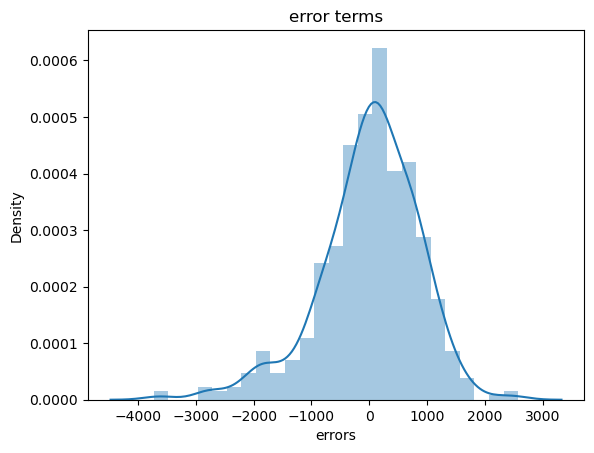

In [853]:
plot_res(y_train,y_train_pred)

### Errors are normally distribured here with mean 0. So everything seems to be fine

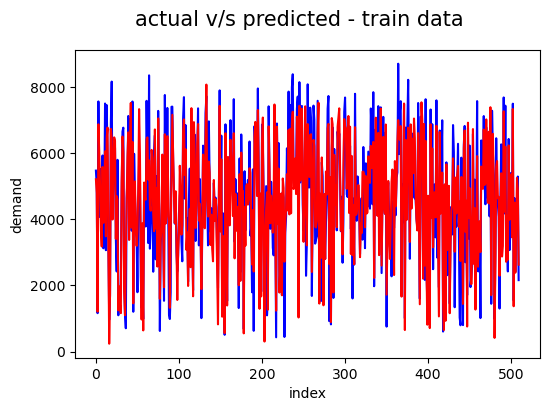

In [854]:
# actual v/s predicted

c = [i for i in range(0,len(X_train),1)]
plt.figure(figsize=(6,4))
plt.plot(c,y_train,color = 'blue')
plt.plot(c,y_train_pred,color = 'red')
plt.suptitle('actual v/s predicted - train data',fontsize = 15)
plt.xlabel('index')
plt.ylabel('demand')
plt.show()

### Actual and Predicted result following almost the same pattern so this model seems ok

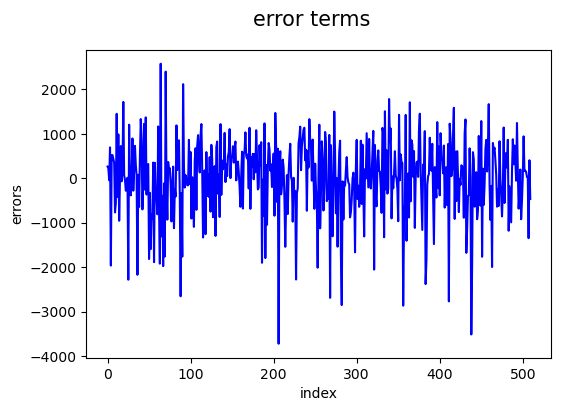

In [855]:
# plotting error terms - 

c = [i for i in range(0,len(X_train),1)]
plt.figure(figsize=(6,4))
plt.plot(c,y_train-y_train_pred,color = 'blue')
plt.suptitle('error terms',fontsize = 15)
plt.xlabel('index')
plt.ylabel('errors')
plt.show()

### Here,If we see the error terms are independent of each other.

In [856]:
# print r2 score of the model - 

r2_score(y_train,y_train_pred)

0.7994085738054738

### Inference-

R2 Same as we obtained for our final model

## 4.2.2 linearity check 

Text(0, 0.5, 'y_train')

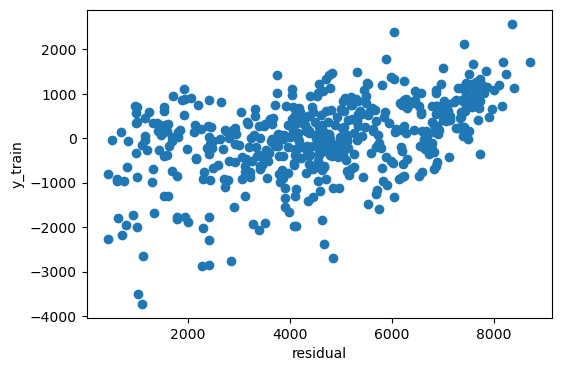

In [857]:
# plotting a scatter plot

residual = y_train-y_train_pred
plt.figure(figsize=(6,4))
plt.scatter(y_train,residual)
plt.xlabel('residual')
plt.ylabel('y_train')

### 4.2.3 predicting values for test datasets-


In [858]:
# scalling variables in test dataset
num_vars = ['temp','atemp','hum','windspeed','days_old']

# test datset only need to transform , no need fitting-
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [859]:
# predicting the values for test data 

y_test_pred = lr.predict(X_test[colmns])

In [860]:
# r2 score for test dataset 

r2_score(y_test,y_test_pred)

0.773469704696088

### Inference - 

R2 value for predictions on test data (0.773) is almost same as R2 value of train data(0.799). This is a good R-squared value, 
hence we can see our model is performing good even on unseen data (test data)

## 4.2.4 Homoscedecity

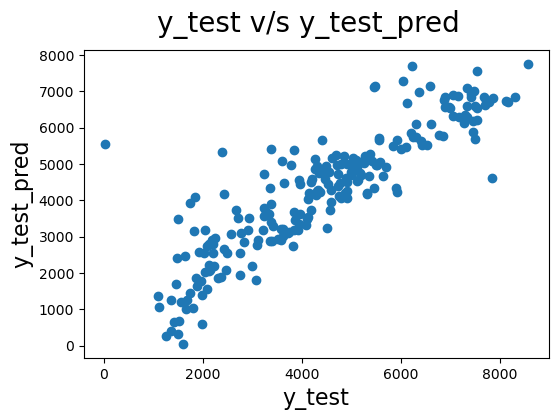

In [861]:
# plotting between y_test & y_test_pred to know the spread 

plt.figure(figsize=(6,4))
plt.scatter(y_test,y_test_pred)
plt.xlabel('y_test',fontsize = 16)
plt.ylabel('y_test_pred',fontsize = 16)
plt.suptitle('y_test v/s y_test_pred',fontsize = 20)
plt.show()

### Inference

We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the 
value of the predictor variable changes.

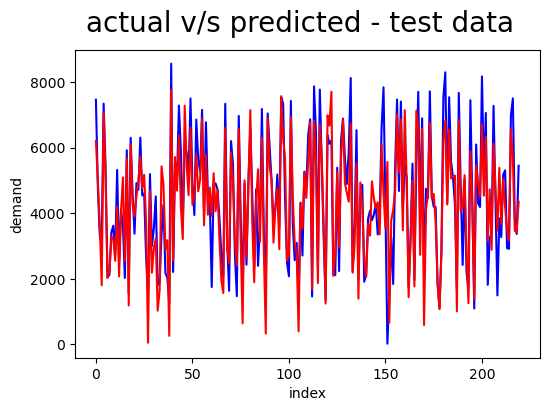

In [862]:
# plotting actual v/s predicted for the test data 

c = [i for i in range(0,len(X_test),1)]
plt.figure(figsize = (6,4))
plt.plot(c,y_test,color = 'blue')
plt.plot(c,y_test_pred,color = 'red')
plt.suptitle('actual v/s predicted - test data',fontsize = 20)
plt.xlabel('index')
plt.ylabel('demand')
plt.show()

### Inference

As we can see predictions for test data is very close to actuals

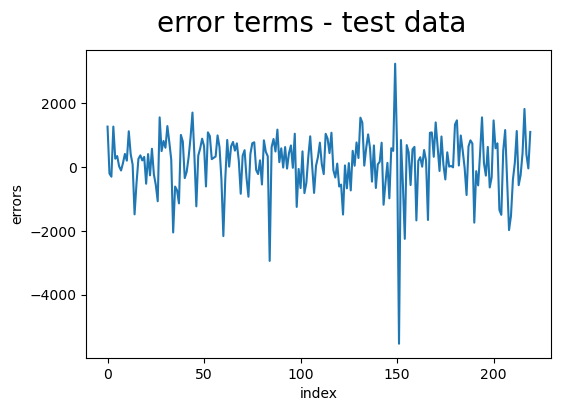

In [863]:
# plotting error terms for the test data 

c = [i for i in range(0,len(X_test),1)]
plt.figure(figsize=(6,4))
plt.plot(c,y_test - y_test_pred)
plt.suptitle('error terms - test data',fontsize = 20)
plt.xlabel('index')
plt.ylabel('errors')
plt.show()

### Inference

As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and 
there are no other parameters that can explain the model better.

## 4.2.5 Intrepretting the Model-

Let us go with interpretting the RFE with Manual model results as we give more importance to imputation

In [864]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it

cols = ['yr','temp','season_winter','mnth_oct','mnth_sep','season_summer','weekday_sun','mnth_aug','weathersit_good']

build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     221.4
Date:                Mon, 12 Aug 2024   Prob (F-statistic):          3.80e-168
Time:                        15:26:19   Log-Likelihood:                -4174.4
No. Observations:                 510   AIC:                             8369.
Df Residuals:                     500   BIC:                             8411.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -406.0370    128.855     

## Interpretation of result-



### Analysing the above model, the comapany should focus on the following features:

Company should focus on expanding business during Summer & winters.
Company should focus on expanding business during September.
Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.
    

### Hence
    
when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also 
advertise a little for September as this is when business would be at its best.
    


### Conclusion
    
Significant variables to predict the demand for shared bikes

temp
Season(summe,winter)
months( august,September, october)
Year (2019)
Sunday
weathersit( Light Snow, Mist + Cloudy)